<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_11_14_227~251%2C_278~289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 06 XGBoost(eXtra Gradient Boost)

#### XGBoost 개요

-트리 기반의 앙상블 학습 중 하나로 GBM에 기반하고 있으나 병렬 CPU환경에서 병렬학습이 가능해 느린 수행시간과 과적합 문제를 해결하며, 각광받고 있음

- 분류와 회귀에서 뛰어난 예측성능

- 자체 과적합 규제를 통해 과적합에 좀 더 강한 내구성

- weak learner에 가중치를 두는 기존 방식과 다르게 병렬 수행으로 GBM에 비해 빠른 속도 보장

- Tree pruning: 부정손실시 분할을 더 이상 수행하지 않는 기존 gbm과 달리 긍정이득이 없는 분할에서도 가지치기 하여 분할을 줄이는 추가적 장점 보유

- 결손값을 자체 처리 가능

- 핵심 라이브러리는 C/C++이나 이를 호출할 수 있는 파이썬패키지를 제공, 사이킷런 특유의 fit(), predict() 적용 불가하나 다양한 유틸리티와 함께 사용될 수 없었으나 이를 해결하기 위해 사이킷런 래퍼 클래스를 개발하여 연동 가능한 것이 있음



conda install c- conda-forge xgboost
import xgboos as xgb
from xgboost import XGBClassifier 
> 오류 메세지가 없어야 정상 설치 완료된 것



####파이썬래퍼XGBoost 하이퍼파라미터
- 유사한 하이퍼 파라미터 소유, 초기의 사이킷런 호환 불가능한 파이썬 래퍼 XGBoost 의 하이퍼 파라미터

> 일반 파라미터

:booster: gbtree와 gblinear을 선택하며 디폴트는 gbtree
silent: 디폴트는 0이며 출력메세지를 나타내고 싶지 않은 경우 1로 설정
nthread: cpu의 실행 스레드 개수를 조정하며 디폴트는 전체 Cpu를 사용하는 것으로 멀티코어/스레드 cpu 시스템에서 전체 Cpu를 사용하지 않고 일부 cpu만 사용해 ml application을 구동하는 경우 변경


> 부스터 파라미터

: eta: gbm의 학습률과 동일한 파라미터로 0-1사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트 되는 학습률 값으로 0.01-0.2사이의 값을 선호하며 디폴트는 구버전 0.3, 신버전 learning_rate = 0.1

num_boost_rounds: n_estimator와 동일

min_child_weight: 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 weight 데이터의 총합으로 과적합을 조절하기 위해 사용하며 클수록 과적합 자제기능 증가

gamma: 트리와 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소값으로 해당  값보다 큰 손실이 감소될 경우 노드를 분리하고 값이 클수록 과적합 방지 기능

max_depth: 트리기반의 것과 동일하며 클수록 과적합 가능성이 높아지며 3-10의 값이 많이 사용됨

sub_sample: gbm’s subsample과 동일하며 과적합 제어를 위해 데이터 샘플링 비율을 지정하며 대체로 0.5-1이 주로 사용

codsample_bytree: max_features와 유사하며 트리 생성에 필요한 피처를 임의로 샘플링 하는데 사용, 너무 많은 피처가 있을 경우 과적합 제어에도 사용

lambda: L2 regulation 적용값, 피러 개수가 많을 수록 적용을 검토하며 값이 클수록 과적합 감소효과

alpha: L1 regulation 적용 값으로 피처 개수가 많을수록 적용을 검토하며 값이 클수록 과적합 감소 효과

scale_pos_weight : 비대칭 클래스의 균형을 유지하기 위한 파라미터

> 학습 태스크 파라미터

objective: 최솟값을 가져야 할 손실함수 정의

binary;logistic 이진분류에 사용

multi;softmax 다중분류일 때 적용, 손실함수가 multi;softmax일 경우 레이블 클래스의 개수인 num_class를 지정해야 함

multi;softprob 개별 레이블 클래스에 해당하는 예측 확률 반환

eval_metric  검증에 사용될 mse, mae, logloss, error, merror, mlogloss, auc 등의 함수 적용

- eta값을 낮추고 num_round를 높여주거나, max_depth 를 낮추거나 min_child_weight , gamma를 높여주거나 subsample , colsample_bytree를 조절하여 트리의 복잡도를 낮추는 방법을 통해 과적합 문제 해결 가능

- 조기 중단 기능, n회를 반복하는 동안 학습오류가 감소하지 않으면 부스팅을 조기에 중단 가능

- import xgboost
print(xgboost.__version__)

을 통해 버전 확인 가능


#### 파이썬 래퍼 XGBoost - 위스콘신 유방암 예측

- 다양한 속성값을 기반으로 악성종양인지 양성 종양인지 분류한 데이터 세트로 양성종양은 성장속도가 느리고 전이되지 않는 것에 비해 악성 종양은 성장 속도가 빠르며 전이되어 생명을 위협

- 사이킷런에서 DataFrame으로 로드 후 일부를 살펴보고자 함

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())


['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
#전체데이터중 80% for train data, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)
print(X_train.shape, X_test.shape)

#for XGBoost, create DMatrix ( only for it, Dataset)
#data's main parameters are data - feature data set,
# label - in classification label data set, in regression float or in data set
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)


(455, 30) (114, 30)


In [ ]:
#create hyper parameter dictionay!
params = { 'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 'early_stoppings':100}
num_rounds = 400

- XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train
() 함수에 파라미터로 전달

- early_stopping_rounds는 반드시 파라미터 eval_set, eval_metric을 요함. eval_set은 성능평가를 수행할 평가용 데이터세트를 설정, eval_metric은 평가세트에 적용할 성능평가방법 설정으로 분류는 error, logloss 적용



In [ ]:
#train 데이터세트는 'train', evaluation(test) 데이터세트는 'eval'로 명기
wlist = [(dtrain, 'train'), (dtest, 'eval')]
#하이퍼파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds, \
                      early_stopping_rounds = 100, evals=wlist) 


[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

- train()으로 학습을 수행하면 반복하며 train-error와 eval-logloss가 지속적으로 감소

- 테스트 데이터세트 예측 수행, xgboost의 predict는 예측 결과 클래스값이 아닌 확률을 반환하나 본 예제는 이진 분류이므로 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결정하는 로직 추가




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
#ROU-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  #ROC AUC print 추가
  print('정확도: {0:.4f}, 정밀도도: {1:.4f}, 재현율: {2:.4f},\
        F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1,roc_auc ))

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행결과값 10개만표시, 예측확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

#예측확률이 0.5보다크면 1, 그렇지지 않으면면 0으로로 예측값결정해해 리스트객체인인 preds에 저장장
preds = [1 if x >5 else 0 for x in pred_probs]
print('예측값 10개만만 표시')

get_clf_eval(y_test, preds, pred_probs)



predict() 수행결과값 10개만표시, 예측확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만만 표시
오차행렬
[[37  0]
 [77  0]]
정확도: 0.3246, 정밀도도: 0.0000, 재현율: 0.0000,        F1: 0.0000, AUC:0.9951


- 내장된 시각화 기능 수행,
plot_importances() 는 피처 중요도를 막대그래프 형식으로 출력하는데 f1스코어를 기본 평가지표로 기반함

- 사이킷런은 estimatorr의 feature_importances_를 이용하여 해야하지만 xgboost는 바로 이용가능

- 단 학습시에 피처명을 바로 알 수 없으니 f뒤에 순서를 붙여 나열할 것

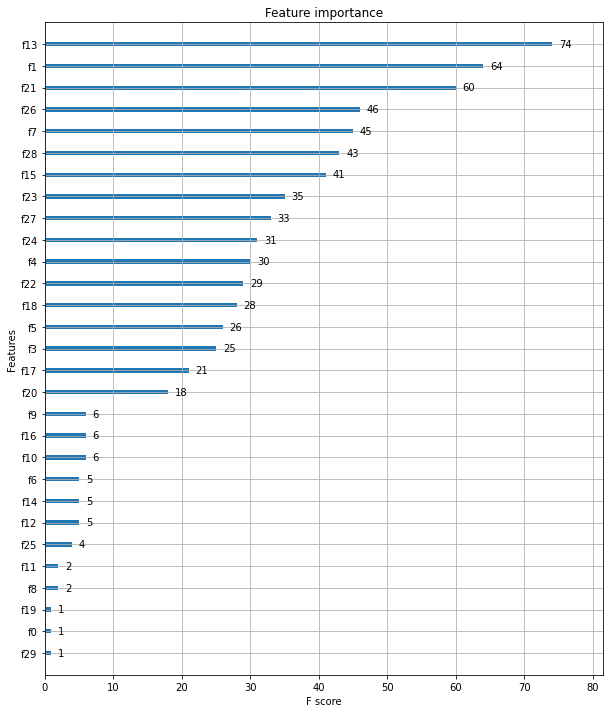

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

- 결정트리에서 보여준 트리기반의 구조도 xgboost에서 시각화 가능하나 graphviz가 설치되어야 함

- 파이썬 래퍼 XGBoost는 GridSearchCV와 유사하게 데이터 세트에 대해 교차검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공

xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrix=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_std = True, seed=0, callbacks=None, shuffle=True)

> params(부스트 파라미터) , dtrain(학습 데이터,0 num_boost_round(부스팅 반복횟수), nfold(cv 폴드 개수), stratified(CV 수행시 층화표본 추출 수행여부) , metrics(CV 수행 시 모니터링할 성능 평가지표), early_stopping_rounds(조기 중단을 활성화시킴, 반복횟수 지정)

#### 사이킷런 래퍼 XGBoost의 개요 및 적용

- XGBClassifier, XGBRegressor로 크게 나뉨

- eta > learning_rate, sub_sample> subsample, lambda > reg_lambda, alpha>reg_alpha로 몇몇 파라미터 이름이 변경됨

- 몇몇 하이퍼 파라미터는 둘 다 적용 가능하나 동시에 있을 경우 사이퍼의 파라미터를 적용



In [ ]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimator = 400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_preds, w_preds_proba)


오차행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도도: 0.9615, 재현율: 0.9740,        F1: 0.9677, AUC:0.9947


- 앞의 파이썬래퍼와 동일한 평가결과가 나옴
 
- 조기 중단을 수행해보고자 함

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper =XGBClassifier(n_estimator=100, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]


[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [ ]:
#조기중단한한 XGBClassifier의의 성능능 살펴보기기
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)


오차행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도도: 0.9615, 재현율: 0.9740,        F1: 0.9677, AUC:0.9947


In [ ]:
#그렇다고너무급격하게줄이면 성능이이 저하될될 우려가가 있음음
#early_stopping rounds를를 10으로로 설정하고고 재학습습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds=xgb_wrapper.predict(X_test)
ws10_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)


[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


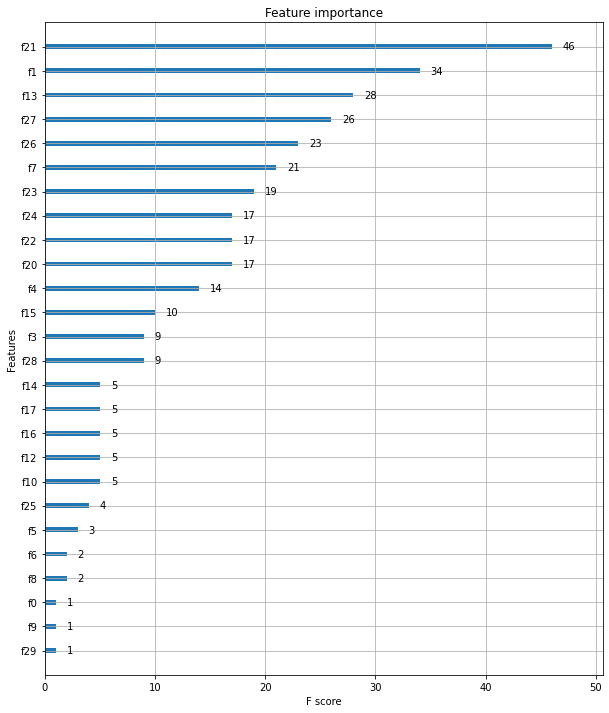

In [ ]:
#피처처 중요도도 시각화모듈인인 plot_importance()에에 사이킷런래퍼클래스를를 입력해도도 앞선선 결과와 같이이 시각화화 결과과 도출출
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런런 wrapper클래스를를 입력해도도 무방방
plot_importance(xgb_wrapper, ax=ax)


### 07 LighGBM

XGBoost에 비해 학습에 걸리는 시간이 현저히 적으며 메모리 사용량이 상대적으로 적은 데에 비해 예측 성능은 큰 차이가 없음

- 단 적은 데이터 수에서 과적합 발생이 쉬움

- 리프 중심 트리 분할방식을 사용하여 최대손실값을 가지는 리프노드를 지속적으로 분할하면서 비대칭적으로 생성되는 트리 분할방식

-원 핫 인코딩 사용 없이 카테고리형 피처 최적 변환 및 이에 따른 노드 분할 수행

-사이킷런 기반 estimaotr를 상속받아 사이킷런 유틸리티 활용 가능

#### LightGBM 설치

#### LightGBM 하이퍼 파라미터

##### 주요 파라미터
- num_iteration(반복 수행하려는 트리의 개수로 사이킷런 호환에서는 n_estimators)
- learing_Rate(학습률, learning rate와 같은 파라미터], max_depth, min_data_in_leaf(min_samples_leaf와 동일), num_leaves(최대리프개수), boosting
(부스팅 트리 생성의 알고리즘으로 gbdt or rf), bagging_fraction( 트리가 커져서 과적합되는 것을 제어하기 위해 데이터 샘플링의 비율을 지정함), feature_fraction(개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율), lambda_12(regulation 제어를 위한 값으로 reg_lambda와 동일), lambda_l1(L1 regulation 제어를 위한 값)

##### Learning Task 파라미터
Objective - 최솟값을 가져야 할 손실함수 정의, XGBoost의 objective와 동일

#### 하이퍼 파라미터 튜닝방안

- num_leaves 개수 중심으로 min_child_samples, max_depth를 함께 조정하며 복잡도를 줄이는 것이 기본 튜닝의 방안

- learning_rate를 크게하며 n_estimator를 크게 하는 것도 좋으나 n_estimaotor가 너무 커질 경우 과적합 가능성이 있음

#### 파이썬 래퍼 LightGBM vs 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

:대부분이 비슷함

####LightGBM 적용 - 위스콘신 유방암 예측



In [ ]:
#lightgbm의의 파이썬썬패키지인인 lightgbm에서서 lgbmclassifier import
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

#80% for train data, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state = 156)

#n_estimator is still 400
lgbm_wrapper = LGBMClassifier(n_estimator=400)

#lightGBM also can early stopping 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도도: 0.9494, 재현율: 0.9740,        F1: 0.9615, AUC:0.9926


### 10 스태킹 앙상블

- 개별적인 여러 알고리즘을 결합해 예측 결과를 도출하나 개별 알고리즘으로 예측한 데이터를 기반, 다시 예측을 수행하는 최종 학습을 수행하고 다시 최종 예측을 진행하는 메타모델 방식에서 큰 차이

- 개별적인 기반 모델과 최종 메타 모델로, 자주 적용되진 않으나 조금이라도 성능수치를 높여야할 경우 자주 사용되며 일반적으로 성능이 비슷한 모델을 결합해 좀 더 나은 성능 향상을 도출하기 위해 적용

- M개의 로우와 N개의 피처(칼럼)을 가진 데이터 세트에 3개의 알고리즘 모델을 학습에 적용시킨다 하면 m개의 로우를 가진 1개의 레이블값을 도출한 애들을 합쳐 새 데이터 세트를 만들고, 이를 최종 모델에 적용하여 최종 예측을 진행

#### 기본 스태킹 모델

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test= train_test_split(X_data, y_label, test_size=0.2, random_state=0)


In [ ]:
#개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

#train with dataset made with stacking, 예측최종모델
lr_final = LogisticRegression(C=10)

#train each model
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
#예측데이터생성성 with each train model and check accuracy of each model
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('randomforest 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('decisiontree 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('ada 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
randomforest 정확도: 0.9649
decisiontree 정확도: 0.9035
ada 정확도: 0.9561


In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

#with transpose, change row n column's location. with column level, make algorithm's predict feature
pred = np.transpose(pred)
print(pred.shape)


(4, 114)
(114, 4)


In [ ]:
lr_final.fit(pred,y_test)
final = lr_final.predict(pred)

print('최종메타모델의 예측정확도 :{0:.4f}'.format(accuracy_score(y_test, final)))


최종메타모델의 예측정확도 :0.9737


####CV 세트기반의 스태킹 

- 개별 모델들이 각각 교차검증으로 메타모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤 이를 기반으로 모델이 학습과 예측을 수행

- 스텝 1에서 학습용 데이터를 n개의 폴드로 나누면 n번의 유사한 반복 작업을 수행하고 마지막 n번째 수행에서 개별 모델의 예측값으로 학습 데이터와 테스트 데이터를 생성

- 폴드 내의 학습용 데이터로 학습을 수행한 후 이 개별 모델이 원본 테스트세트로 예측한 결괏값을 최종 평균하여 메타모델에서 사용할 테스트 데이터를 생성하고, 이를 최종적으로 모두 합쳐 메타모델이 사용할 학습 데이터와 테스트 데이터를 생성하면, 이를 바탕으로 원본 데이터와 레이블 데이터를 합쳐 메타 모델을 학습시킨 뒤 최종 테스트 데이터로 예측을 수행하고, 최종예측결과를 원본 테스트 데이터의 레이블 데이터와 비교하여 평가

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

#개별기반모델에서최종메타모델이사용할할 학습및 테스트용데이터를를 생성하기기 위한한 함수수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n,n_folds ):
  #지정된 nfolds값으로KFold생성.
  kf = KFold(n_splits=n_folds, shuffle=True, random_state=0) 
  #추후에메타모델이사용할학습데이터반환을위한넘파이배열초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1 ))
  test_pred =np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__," model start")

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
  #입력된학습데이터에서기반모델이학습/예측할폴드 데이터세트추출
    print('\t폴드세트: ,',folder_counter, 'start' )
    X_tr = X_train_n[train_index]
    y_tr =y_train_n[train_index]
    X_te = X_train_n[valid_index]
    model.fit(X_tr, y_tr)
    train_fold_pred[valid_index,: ] =model.predict(X_te).reshape(-1, 1)
    test_pred[:, folder_counter] =model.predict(X_test_n)
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
  return train_fold_pred, test_pred_mean

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model start
	폴드세트: , 0 start
	폴드세트: , 1 start
	폴드세트: , 2 start
	폴드세트: , 3 start
	폴드세트: , 4 start
	폴드세트: , 5 start
	폴드세트: , 6 start
RandomForestClassifier  model start
	폴드세트: , 0 start
	폴드세트: , 1 start
	폴드세트: , 2 start
	폴드세트: , 3 start
	폴드세트: , 4 start
	폴드세트: , 5 start
	폴드세트: , 6 start
DecisionTreeClassifier  model start
	폴드세트: , 0 start
	폴드세트: , 1 start
	폴드세트: , 2 start
	폴드세트: , 3 start
	폴드세트: , 4 start
	폴드세트: , 5 start
	폴드세트: , 6 start
AdaBoostClassifier  model start
	폴드세트: , 0 start
	폴드세트: , 1 start
	폴드세트: , 2 start
	폴드세트: , 3 start
	폴드세트: , 4 start
	폴드세트: , 5 start
	폴드세트: , 6 start


In [ ]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본학습피처데이터 shape', X_train.shape,'원본 test 피처데이터 shape',X_test.shape )
print('stacking 학습피처데이터 shape', Stack_final_X_train.shape,'stacking test 피처데이터 shape',Stack_final_X_test.shape )

원본학습피처데이터 shape (455, 30) 원본 test 피처데이터 shape (114, 30)
stacking 학습피처데이터 shape (455, 3) stacking test 피처데이터 shape (114, 4)


In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('predict accuracy of final meta model',accuracy_score(y_test, stack_final))

ValueError: ignored

### 11 정리

- 앙상블은 결정트리 기반의 다수의 약한 학습기를 결합해 변동성을 줄여 예측 오류를 줄이고 성능을 개선하는 것으로 단점으로는 균일한 예측 결과를 위해 결정트리가 깊어지고 복잡해지면서 과적합 가능성 존재

- 학습 데이터의 중복을 허용하여 다수의 세트로 샘플링하여 다수의 약한 학습기가 학습한 뒤 최종 결과를 결합해 예측하는 방식

- 현대의 주류인 부스팅은 순차적으로 학습기들이 학습하며 예측이 틀린 경우 가중치를 부여해 다음번 학습기가 학습할 때 예측이 틀린 데이터에 대해 높은 정확도로 예측할 수 있도록 하는 것

- XGBoost, LightGBM

- 스태킹은 여러개의 개별 모델들이 생성한 예측 데이터를 기반으로 최종 메타모델이 학습할 별도의 학습 데이터 세트와 ㅇ예측 값들을 스태킹 형태로 결합해 생성하는 데 있음